In [70]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [71]:
all_df = pd.read_excel("data/titanic3.xls")

In [72]:
cols=['survived','name','pclass','sex','age','sibsp',
     'parch','fare','embarked']
all_df = all_df[cols]

In [73]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [74]:
print('total:',len(all_df),
     'train:',len(train_df),
     'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [75]:
def PreprocessData(raw_df):
    df = raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked"])
    
    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures,Label

In [76]:
train_Features,train_Label= PreprocessData(train_df)
test_Features,test_Label = PreprocessData(test_df)

In [77]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [78]:
model = Sequential()

In [79]:
model.add(Dense(units=40, input_dim=9,
               kernel_initializer='uniform',
               activation='relu'))

In [80]:
model.add(Dense(units=30,
               kernel_initializer='uniform',
               activation='relu'))

In [81]:
model.add(Dense(units=1,
               kernel_initializer='uniform',
               activation='sigmoid'))

In [82]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [83]:
train_history=model.fit(x=train_Features,
                       y=train_Label,
                       validation_split=0.1,
                       epochs=30,
                       batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 1s - loss: 0.6900 - acc: 0.5774 - val_loss: 0.6704 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6672 - acc: 0.5968 - val_loss: 0.5892 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6100 - acc: 0.6667 - val_loss: 0.4942 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5476 - acc: 0.7634 - val_loss: 0.4624 - val_acc: 0.7596
Epoch 5/30
 - 0s - loss: 0.5084 - acc: 0.7602 - val_loss: 0.4558 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4924 - acc: 0.7667 - val_loss: 0.4418 - val_acc: 0.7885
Epoch 7/30
 - 0s - loss: 0.4837 - acc: 0.7613 - val_loss: 0.4432 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4799 - acc: 0.7581 - val_loss: 0.4370 - val_acc: 0.7885
Epoch 9/30
 - 0s - loss: 0.4744 - acc: 0.7602 - val_loss: 0.4303 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.4708 - acc: 0.7763 - val_loss: 0.4280 - val_acc: 0.7788
Epoch 11/30
 - 0s - loss: 0.4666 - acc: 0.7602 - val_loss: 0.4257 - val_acc: 0.7981
Epoch 12/30
 - 0s - loss: 0.4648 - acc:

In [84]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

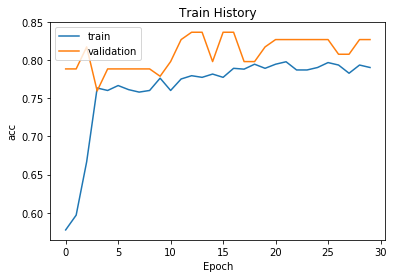

In [85]:
show_train_history(train_history,'acc','val_acc')

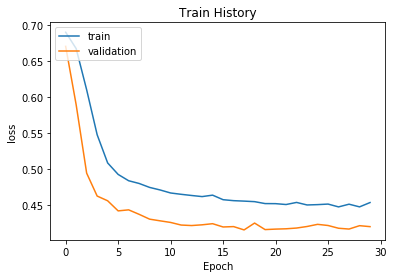

In [86]:
show_train_history(train_history,'loss','val_loss')

In [87]:
scores=model.evaluate(x=test_Features,
                     y=test_Label)

275/275 [==============================] - 0s 58us/step


In [88]:
scores[1]

0.80727272770621561

In [89]:
Jack = pd.Series([0, 'Jack',3,'male', 23,1,0,5.0000,'S'])
Rose = pd.Series([1, 'Rose',1,'female',20,1,0,100.0000,'S'])

In [90]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],
                    columns=['survived', 'name', 'pclass', 'sex',
                            'age', 'sibsp', 'parch', 'fare', 'embarked'])

In [91]:
all_df = pd.concat([all_df,JR_df])

In [92]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [93]:
all_Features,Label=PreprocessData(all_df)

In [94]:
all_probability=model.predict(all_Features)

In [95]:
all_probability[:10]

array([[ 0.97643948],
       [ 0.59737653],
       [ 0.97332847],
       [ 0.38693938],
       [ 0.97133631],
       [ 0.27397493],
       [ 0.94542527],
       [ 0.32501462],
       [ 0.94402915],
       [ 0.29647994]], dtype=float32)

In [96]:
pd = all_df
pd.insert(len(all_df.columns),
         'probability',all_probability)

In [97]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.145264
1,1,Rose,1,female,20.0,1,0,100.0,S,0.968890


In [98]:
pd[(pd['survived']==0) & (pd['probability']>0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.973328
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.971336
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.978593
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.976266
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.961194


In [99]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.976439
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.597377
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.973328
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.386939
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.971336
